In [346]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [366]:
class  ChessBoard:
    
    def __init__(self):
        
        self.board = np.zeros([3,3])  # Chess board, where value 1 means occupaid by player 1 , 2 means occupaid by player 2
        self.wl = 0

    def isEnd(self):
        
        if np.count_nonzero(self.board)==9 or self.wl>0:
            return True
        else:
            return False
        
    def canWin(self, posX, posY, player):
        
        if not self.board[posX,posY] == 0:
            raise Exception('This grid is already occupaid')
        
        
        s = copy.copy(self.board)
        s[posX,posY] = player
        
        if player == 1:
            if np.array_equal(s[0,:], [1,1,1]) or np.array_equal(s[1,:], [1,1,1]) or np.array_equal(s[2,:], [1,1,1])\
            or np.array_equal(s[:,0], [1,1,1]) or np.array_equal(s[:,1], [1,1,1]) or np.array_equal(s[:,2], [1,1,1])\
            or np.array_equal(s[[0,1,2],[0,1,2]], [1,1,1]) or np.array_equal(s[[2,1,0],[0,1,2]], [1,1,1]):
                return 1
            else:
                return 0
            
        if player == 2:
            if np.array_equal(s[0,:], [2,2,2]) or np.array_equal(s[1,:], [2,2,2]) or np.array_equal(s[2,:], [2,2,2])\
            or np.array_equal(s[:,0], [2,2,2]) or np.array_equal(s[:,1], [2,2,2]) or np.array_equal(s[:,2], [2,2,2])\
            or np.array_equal(s[[0,1,2],[0,1,2]], [2,2,2]) or np.array_equal(s[[2,1,0],[0,1,2]], [2,2,2]):
                return 1
            else:
                return 0
            
            
            
            
    def play(self, posX, posY, player):
        
        if not self.board[posX,posY] == 0:
            raise Exception('This grid is already occupaid')
        
        self.board[posX,posY] = player
#         print(self.board)
        
        if np.array_equal(self.board[0,:], [1,1,1]) or np.array_equal(self.board[1,:], [1,1,1]) or np.array_equal(self.board[2,:], [1,1,1])\
        or np.array_equal(self.board[:,0], [1,1,1]) or np.array_equal(self.board[:,1], [1,1,1]) or np.array_equal(self.board[:,2], [1,1,1])\
        or np.array_equal(self.board[[0,1,2],[0,1,2]], [1,1,1]) or np.array_equal(self.board[[2,1,0],[0,1,2]], [1,1,1]):
            self.wl = 1
        
        if np.array_equal(self.board[0,:], [2,2,2]) or np.array_equal(self.board[1,:], [2,2,2]) or np.array_equal(self.board[2,:], [2,2,2])\
        or np.array_equal(self.board[:,0], [2,2,2]) or np.array_equal(self.board[:,1], [2,2,2]) or np.array_equal(self.board[:,2], [2,2,2])\
        or np.array_equal(self.board[[0,1,2],[0,1,2]], [2,2,2]) or np.array_equal(self.board[[2,1,0],[0,1,2]], [2,2,2]):
            self.wl = 2



In [371]:
# Reinforcement Learning by update of value function


#################### Training Stage #########################

# Parameters
alpha = 0.1 # Learning rate
N = 100000 # Total playing count

# Initialization

V1 = 0.5*np.ones([3,3]) # Value function of first player(offensive)
V2 = 0.5*np.ones([3,3]) # Value function of second player(defensive)

winCount1 = 0
winCount2 = 0

for n in range(N): # each game
    
    # start a new game
    c = ChessBoard()
    isFirstTurn = True
    
    while not c.isEnd(): # each turn
        
        # Action decision of player 1
        
        can1Win = 0
        
        for posX_next in range(3): #greedy
            for posY_next in range(3):
                if c.board[posX_next, posY_next]==0 and c.canWin( posX_next, posY_next, 1 ):
                    V1_next = 1
                    next_posX = posX_next
                    next_posY = posY_next
                    can1Win = 1
                    V2_next = 0
                    winCount1 += 1
        
        #print(c.board)
        
        if not can1Win: #randomly select
            tmp = np.argwhere(c.board == 0)
            idx = np.random.randint(np.shape(tmp)[0])
            next_posX = tmp[idx,0]
            next_posY = tmp[idx,1]
            V1_next = 0.5
            V2_next = 0.5
        
        if not isFirstTurn:
            V1[posX1,posY1] = V1[posX1,posY1] + alpha * ( V1_next - V1[posX1,posY1] )
            V2[posX2,posY2] = V2[posX2,posY2] + alpha * ( V2_next - V2[posX2,posY2] )
        
        
        c.play(next_posX , next_posY, 1)
        
        posX1 = next_posX
        posY1 = next_posY
        
        
        if c.isEnd():
            continue
        
        # Action decision of player 2
        
        can2Win = 0
        
        for posX_next in range(3):
            for posY_next in range(3):
                if c.board[posX_next, posY_next]==0 and c.canWin( posX_next, posY_next, 2 ):
                    V2_next = 1
                    next_posX=posX_next
                    next_posY=posY_next
                    can2Win = 1
                    V1_next = 0
                    winCount2 += 1
                    
        if not can2Win: #randomly select
            tmp = np.argwhere(c.board == 0)
            idx = np.random.randint(np.shape(tmp)[0])
            next_posX = tmp[idx,0]
            next_posY = tmp[idx,1]
            V1_next = 0.5
            V2_next = 0.5
            
        if not isFirstTurn:
            V1[posX1,posY1] = V1[posX1,posY1] + alpha * ( V1_next - V1[posX1,posY1] )
            V2[posX2,posY2] = V2[posX2,posY2] + alpha * ( V2_next - V2[posX2,posY2] )
        
        c.play(next_posX , next_posY, 2)
        
        posX2 = next_posX
        posY2 = next_posY    
        
        isFirstTurn = False
        
#     print('One game!')
    
    

72081
27426


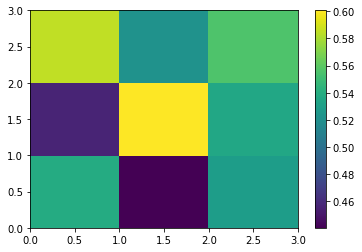

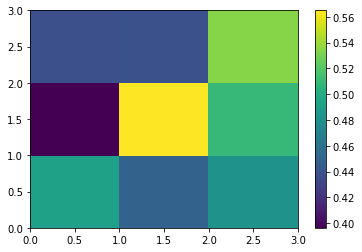

In [372]:
print(winCount1)
print(winCount2)

plt.pcolor(V1)
plt.colorbar()
plt.show()

plt.pcolor(V2)
plt.colorbar()
plt.show()

In [374]:
# Reinforcement Learning by update of value function


#################### Practice Stage #########################

# Parameters

N = 10000 # Total playing count

# Initialization


winCount1 = 0
winCount2 = 0

for n in range(N): # each game
    
    # start a new game
    c = ChessBoard()
    isFirstTurn = True
    
    while not c.isEnd(): # each turn
        
        # Action decision of player 1
        
        can1Win = 0
        
        for posX_next in range(3): #greedy
            for posY_next in range(3):
                if c.board[posX_next, posY_next]==0 and c.canWin( posX_next, posY_next, 1 ):
                    next_posX = posX_next
                    next_posY = posY_next
                    can1Win = 1
        if can2Win:
            winCount2 += 1
        
        #print(c.board)
        
        if not can1Win: #randomly greedy select
            tmp = np.argwhere(c.board == 0)
            ps = np.array([V1[i,j] for [i,j] in tmp]) 
            idx = np.random.choice(np.shape(tmp)[0],1,p = np.power(ps,10)/np.sum(np.power(ps,10)) )
            next_posX = tmp[idx,0]
            next_posY = tmp[idx,1]
        
#         if not can1Win: #randomly select
#             tmp = np.argwhere(c.board == 0)
#             idx = np.random.randint(np.shape(tmp)[0])
#             next_posX = tmp[idx,0]
#             next_posY = tmp[idx,1]
        
        
        c.play(next_posX , next_posY, 1)
        
        posX1 = next_posX
        posY1 = next_posY
        
        
        if c.isEnd():
            continue
        
        # Action decision of player 2
        
        can2Win = 0
        
        for posX_next in range(3):
            for posY_next in range(3):
                if c.board[posX_next, posY_next]==0 and c.canWin( posX_next, posY_next, 2 ):
                    next_posX=posX_next
                    next_posY=posY_next
                    can2Win = 1
        if can2Win:
            winCount2 += 1
                    
                    
#         if not can2Win: #random greedy select
#             tmp = np.argwhere(c.board == 0)
#             ps = np.array([V2[i,j] for [i,j] in tmp]) 
#             idx = np.random.choice(np.shape(tmp)[0],1,p = np.power(ps,10)/np.sum(np.power(ps,10)) )
#             next_posX = tmp[idx,0]
#             next_posY = tmp[idx,1]
            
        if not can2Win: #randomly select
            tmp = np.argwhere(c.board == 0)
            idx = np.random.randint(np.shape(tmp)[0])
            next_posX = tmp[idx,0]
            next_posY = tmp[idx,1]
            
        c.play(next_posX , next_posY, 2)
        
        posX2 = next_posX
        posY2 = next_posY    
        
        isFirstTurn = False
        
#     print('One game!')
    
    
    

In [375]:
print(winCount1)
print(winCount2)


8458
1813
